### General imports

In [1]:
import os, sys

# Add the source code file in the path.
module_path = os.path.abspath(os.path.join('../src/'))

if module_path not in sys.path:
    sys.path.append(module_path)
# _end_if_

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from som import SOM
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

## Example 1: Iris dataset

In [4]:
# Load the iris dataset.
iris = datasets.load_iris()

# Get the dimensions of the data.
N, D = iris.data.shape

# Make an array with data indexes.
idx = np.arange(N)

# Randomize of the indexes (in place).
np.random.shuffle(idx)

In [5]:
# Split the datasets to train/test.
train_data = iris.data[idx[:100], :]
train_label = iris.target[idx[:100]]

test_data = iris.data[idx[100:], :]
test_label = iris.target[idx[100:]]

In [6]:
# Build the SOM model.
som_model_01 = SOM(m=20, d=D)

 SOM training started ...
 [2024-03-27 13:38:35] -> Epoch 10: Error 0.101860
 [2024-03-27 13:38:38] -> Epoch 20: Error 0.022502
 [2024-03-27 13:38:40] -> Epoch 30: Error 0.009927
 [2024-03-27 13:38:41] -> Epoch 40: Error 0.006045
 [2024-03-27 13:38:42] -> Epoch 50: Error 0.002466
 [2024-03-27 13:38:43] -> Epoch 60: Error 0.003213
 [2024-03-27 13:38:44] -> Epoch 70: Error 0.002493
 [2024-03-27 13:38:44] -> Epoch 80: Error 0.004385
 [2024-03-27 13:38:44] -> Epoch 90: Error 0.003089
 [2024-03-27 13:38:45] -> Epoch 100: Error 0.001268
 [2024-03-27 13:38:45] -> Epoch 110: Error 0.000593
 [2024-03-27 13:38:45] -> Epoch 120: Error 0.000167
 Training process ended in: 14.243 sec.
 SOM training converged at epoch 130 with error 0.000058.


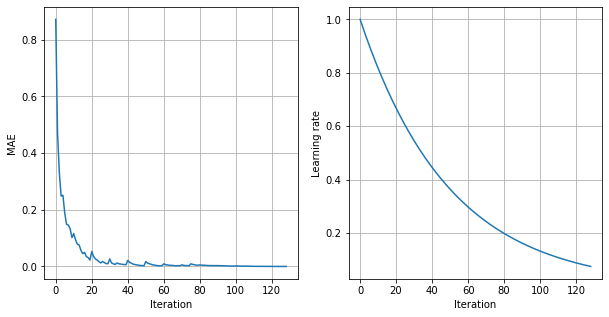

In [7]:
# Fit (train) the model to the data.
som_model_01.train(train_data, shuffle_input=True, epochs=500)

# Plot the training error (MAE) and the learning rate.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# -----------------------------
ax[0].plot(som_model_01.errors);
ax[0].grid(True);
ax[0].set_xlabel("Iteration");
ax[0].set_ylabel("MAE");

# --------------------------
ax[1].plot(som_model_01.eta);
ax[1].grid(True);
ax[1].set_xlabel("Iteration");
ax[1].set_ylabel("Learning rate");

In [8]:
# This will return the positions (on the grid)
# of the data used to train the network.
predictions_train = som_model_01.predict(train_data)

# This will give the positions of the test (unseen)
# data on the trained grid.
predictions_test = som_model_01.predict(test_data)

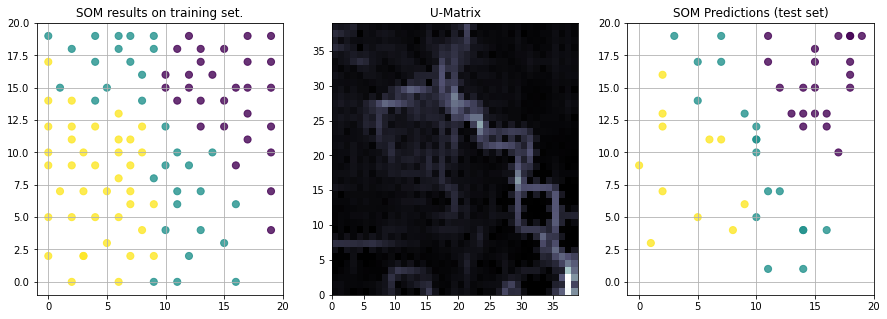

In [9]:
# Get the model network dimensions.
m, n, _ = som_model_01.shape

# Plot the results.
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].scatter(predictions_train[:, 0],
              predictions_train[:, 1],
              c=train_label, alpha=0.8, s=50)
ax[0].title.set_text('SOM results on training set.')
ax[0].set_xlim([-1, m])
ax[0].set_ylim([-1, n])
ax[0].grid(True)

# ------------------------

ax[1].pcolor(som_model_01.u_matrix.T, cmap='bone')
ax[1].title.set_text('U-Matrix')

# ------------------------
ax[2].scatter(predictions_test[:, 0],
              predictions_test[:, 1],
              c=test_label, alpha=0.8, s=50)
ax[2].title.set_text('SOM Predictions (test set)')
ax[2].set_xlim([-1, m])
ax[2].set_ylim([-1, n])
ax[2].grid(True)

### End of 1st example.

## Example 2: Digits dataset

In [10]:
# Load digits data.
digits = datasets.load_digits()

In [11]:
# Get the dimensions of the data.
N, D = digits.data.shape

# Make an array with data indexes.
idx = np.arange(N)

# Randomize of the indexes (in place).
np.random.shuffle(idx)

In [12]:
# Create a data scaler.
scaler = StandardScaler()

# Scale the data to bring them in the same scale.
digits.data = scaler.fit_transform(digits.data)

In [13]:
# Split randomly train/test.
train_data = digits.data[idx[:1200], :]
train_label = digits.target[idx[:1200]]

test_data = digits.data[idx[1200:], :]
test_label = digits.target[idx[1200:]]

In [14]:
# Build the SOM model.
som_model_02 = SOM(m=25, d=D)

 SOM training started ...
 [2024-03-27 13:39:50] -> Epoch 10: Error 0.275824
 [2024-03-27 13:40:37] -> Epoch 20: Error 0.177924
 [2024-03-27 13:41:13] -> Epoch 30: Error 0.153034
 [2024-03-27 13:41:39] -> Epoch 40: Error 0.101600
 [2024-03-27 13:41:58] -> Epoch 50: Error 0.049696
 [2024-03-27 13:42:12] -> Epoch 60: Error 0.015087
 [2024-03-27 13:42:22] -> Epoch 70: Error 0.002366
 [2024-03-27 13:42:30] -> Epoch 80: Error 0.001966
 [2024-03-27 13:42:37] -> Epoch 90: Error 0.003584
 [2024-03-27 13:42:42] -> Epoch 100: Error 0.000791
 [2024-03-27 13:42:46] -> Epoch 110: Error 0.000652
 [2024-03-27 13:42:51] -> Epoch 120: Error 0.026032
 [2024-03-27 13:42:54] -> Epoch 130: Error 0.003821
 [2024-03-27 13:42:57] -> Epoch 140: Error 0.001135
 [2024-03-27 13:43:00] -> Epoch 150: Error 0.000483
 [2024-03-27 13:43:03] -> Epoch 160: Error 0.000252
 Training process ended in: 259.989 sec.
 SOM training converged at epoch 170 with error 0.000150.


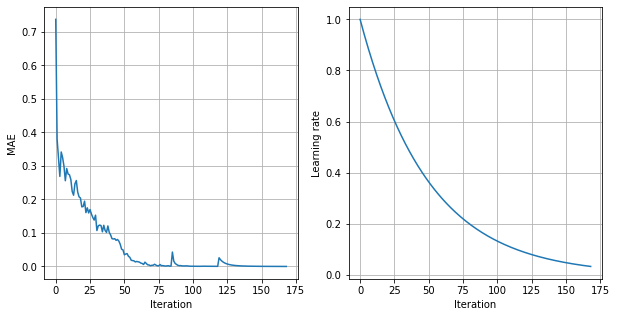

In [15]:
# Fit it to the data.
som_model_02.train(train_data, epochs=500)

# Create a figure with two plots.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the errors.
# -----------------------------
ax[0].plot(som_model_02.errors);
ax[0].grid(True);
ax[0].set_xlabel("Iteration");
ax[0].set_ylabel("MAE");

# --------------------------
ax[1].plot(som_model_02.eta);
ax[1].grid(True);
ax[1].set_xlabel("Iteration");
ax[1].set_ylabel("Learning rate");

In [16]:
# This will return the positions (on the grid)
# of the data used to train the network.
predictions_train = som_model_02.predict(train_data)

# This will give the positions of the test (unseen)
# data on the trained grid.
predictions_test = som_model_02.predict(test_data)

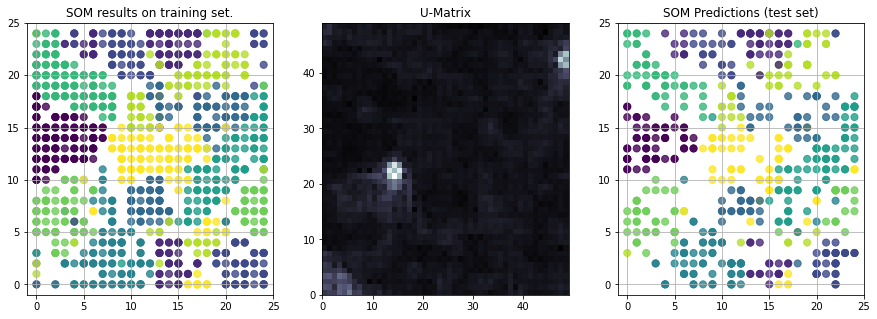

In [17]:
# Get the model network dimensions.
m, n, _ = som_model_02.shape

# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].scatter(predictions_train[:, 0],
              predictions_train[:, 1],
              c=train_label, alpha=0.8, s=50)
ax[0].title.set_text('SOM results on training set.')
ax[0].set_xlim([-1, m])
ax[0].set_ylim([-1, n])
ax[0].grid(True)

# ------------------------

ax[1].pcolor(som_model_02.u_matrix.T, cmap='bone')
ax[1].title.set_text('U-Matrix')

# ------------------------
ax[2].scatter(predictions_test[:, 0],
              predictions_test[:, 1],
              c=test_label, alpha=0.8, s=50)
ax[2].title.set_text('SOM Predictions (test set)')
ax[2].set_xlim([-1, m])
ax[2].set_ylim([-1, n])
ax[2].grid(True)

### End of 2nd example.

## Example 3: Breast cancer dataset

In [18]:
# Load breast cancer data data.
breast_cancer = datasets.load_breast_cancer()

In [19]:
# Create a data scaler.
scaler = StandardScaler()

# Scale the data.
breast_cancer.data = scaler.fit_transform(breast_cancer.data)

In [20]:
# Get the dimensions of the data.
N, D = breast_cancer.data.shape

In [21]:
# Random shuffle the data indexes.
idx = np.arange(N)
np.random.shuffle(idx)

In [22]:
# Split randomly train/test.
train_data = breast_cancer.data[idx[:500], :]
train_label = breast_cancer.target[idx[:500]]

test_data = breast_cancer.data[idx[500:], :]
test_label = breast_cancer.target[idx[500:]]

In [23]:
# Build the SOM model.
som_model_03 = SOM(m=20, d=D)

 SOM training started ...
 [2024-03-27 13:43:25] -> Epoch 10: Error 0.265233
 [2024-03-27 13:43:39] -> Epoch 20: Error 0.125946
 [2024-03-27 13:43:49] -> Epoch 30: Error 0.074362
 [2024-03-27 13:43:57] -> Epoch 40: Error 0.048629
 [2024-03-27 13:44:02] -> Epoch 50: Error 0.011869
 [2024-03-27 13:44:06] -> Epoch 60: Error 0.001480
 [2024-03-27 13:44:09] -> Epoch 70: Error 0.002015
 [2024-03-27 13:44:11] -> Epoch 80: Error 0.001711
 [2024-03-27 13:44:13] -> Epoch 90: Error 0.000709
 [2024-03-27 13:44:14] -> Epoch 100: Error 0.000570
 [2024-03-27 13:44:16] -> Epoch 110: Error 0.025674
 [2024-03-27 13:44:17] -> Epoch 120: Error 0.004997
 [2024-03-27 13:44:18] -> Epoch 130: Error 0.001532
 [2024-03-27 13:44:19] -> Epoch 140: Error 0.000609
 [2024-03-27 13:44:20] -> Epoch 150: Error 0.000309
 [2024-03-27 13:44:21] -> Epoch 160: Error 0.000168
 Training process ended in: 73.553 sec.
 SOM training converged at epoch 164 with error 0.000136.


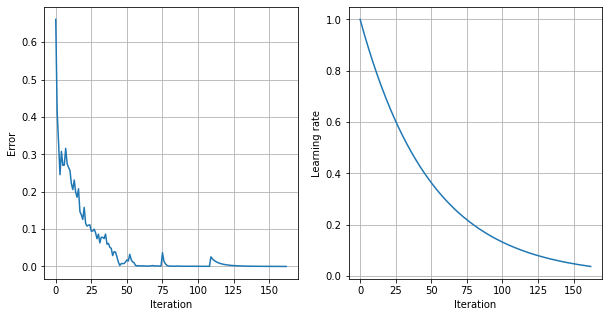

In [24]:
# Reset the model.
som_model_03.reset_network()

# Fit it to the data.
som_model_03.train(train_data, epochs=500)

# Plot the errors.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# -----------------------------
ax[0].plot(som_model_03.errors);
ax[0].grid(True);
ax[0].set_xlabel("Iteration");
ax[0].set_ylabel("Error");

# --------------------------
ax[1].plot(som_model_03.eta);
ax[1].grid(True);
ax[1].set_xlabel("Iteration");
ax[1].set_ylabel("Learning rate");

In [25]:
# This will return the positions (on the grid) of the data used to train the network.
predictions_train = som_model_03.predict(train_data)

# This will give the positions of the test (unseen) data on the trained grid.
predictions_test = som_model_03.predict(test_data)

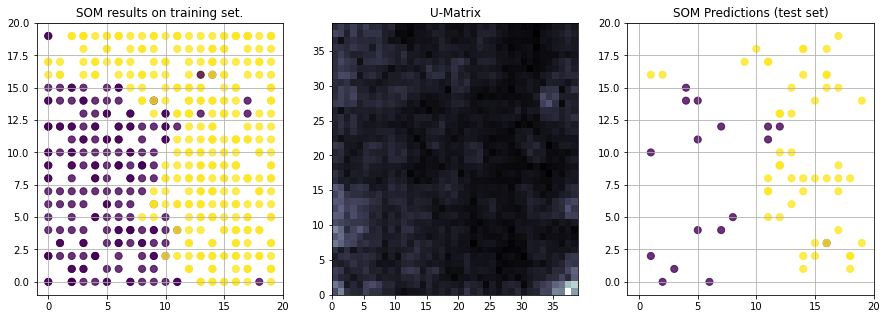

In [26]:
# Get the model network dimensions.
m, n, _ = som_model_03.shape

# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].scatter(predictions_train[:, 0],
              predictions_train[:, 1],
              c=train_label, alpha=0.8, s=50)
ax[0].title.set_text('SOM results on training set.')
ax[0].set_xlim([-1, m])
ax[0].set_ylim([-1, n])
ax[0].grid(True)

# ------------------------

ax[1].pcolor(som_model_03.u_matrix.T, cmap='bone')
ax[1].title.set_text('U-Matrix')

# ------------------------
ax[2].scatter(predictions_test[:, 0],
              predictions_test[:, 1],
              c=test_label, alpha=0.8, s=50)
ax[2].title.set_text('SOM Predictions (test set)')
ax[2].set_xlim([-1, m])
ax[2].set_ylim([-1, n])
ax[2].grid(True)

### End of 3rd example.